In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [36]:
import struct                                                                                                    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

filename = '/home/gsilvest/Work/Dec2019_FOOT_data/HF000T/txt/data/HF000T_PL_007.dat.csv'

data = np.loadtxt(filename, dtype="float", delimiter=",")
data = np.delete(data,1206,0)

In [82]:
def clusterize(data, highThresh, lowThresh, symmetric = False, symmetric_width = 1):
    
    col_names =  ['evt', 'nclust', 'seed', 'signal', 'width', 'address', 'cog']
    CLUSTERS  = pd.DataFrame(columns = col_names)
    CLUSTERS

    for cnt, event in enumerate(data):
        seeds = np.where(event > high_threshold)[0] # candidate seed strips over high threshold
        seeds = np.delete(seeds,np.where(np.diff(seeds)==1)[0]) # remove adjacent strips over threshold (to prevent counting same cluster 2 times)    
        if not(np.size(seeds) == 0):
            nclust = np.size(seeds)
            for seed in np.nditer(seeds):
                if symmetric == True:
                    if int(seed) - symmetric_width >= 0 and int(seed) + symmetric_width < len(event):
                        seed = int(seed)
                        signal = np.sum(event[seed - symmetric_width :  seed + symmetric_width])
                        width = 2 * symmetric_width + 1
                        cogN = np.sum(event[seed - symmetric_width :  seed + symmetric_width] * np.arange(seed - symmetric_width, seed + symmetric_width))
                        cogD = np.sum(event[seed - symmetric_width :  seed + symmetric_width])
                        address = seed

                        CLUSTERS = CLUSTERS.append( dict(evt = int(cnt + 1),
                                                         nclust = int(nclust),
                                                         seed = int(seed),
                                                         signal = signal,
                                                         width = int(width),
                                                         address = int(address),
                                                         cog = (cogN / cogD)), ignore_index=True)
                    else:
                        continue
                else:
                    seed = int(seed)
                    signal = event[seed]
                    width = 1
                    cogN = seed * event[seed]
                    cogD = event[seed]
                    address = seed
                    L = 0
                    R = 0

                    overThreshL = True
                    overThreshR = True


                    while overThreshL:
                        if (seed - L - 1) >= 0:
                            if event[seed - L - 1] > low_threshold and event[seed - L - 1] < high_threshold:
                                signal += event[seed - L - 1]
                                cogN += (seed - L - 1) * event[seed - L - 1]
                                cogD += event[seed - L - 1]
                                address = (seed - L - 1)
                                width += 1
                                L += 1
                            else:
                                overThreshL = False


                    while overThreshR:
                        if (seed + R + 1) < len(event):
                            if event[seed + R + 1] > low_threshold and event[seed + R + 1] > high_threshold:
                                signal += event[seed + R + 1]
                                cogN += (seed + R + 1) * event[seed + L + 1]
                                cogD += event[seed + L + 1]
                                R += 1
                                width += 1
                            else:
                                overThreshR = False

                    CLUSTERS = CLUSTERS.append( dict(evt = int(cnt + 1),
                                                     nclust = int(nclust),
                                                     seed = int(seed),
                                                     signal = signal,
                                                     width = int(width),
                                                     address = int(address),
                                                     cog = (cogN / cogD)), ignore_index=True)
        else:
            continue
        
    return CLUSTERS

In [99]:
high_threshold = 40
low_threshold = 20

CLUSTERS = clusterize(data, high_threshold, low_threshold)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e0caeb10>],
      dtype=object)

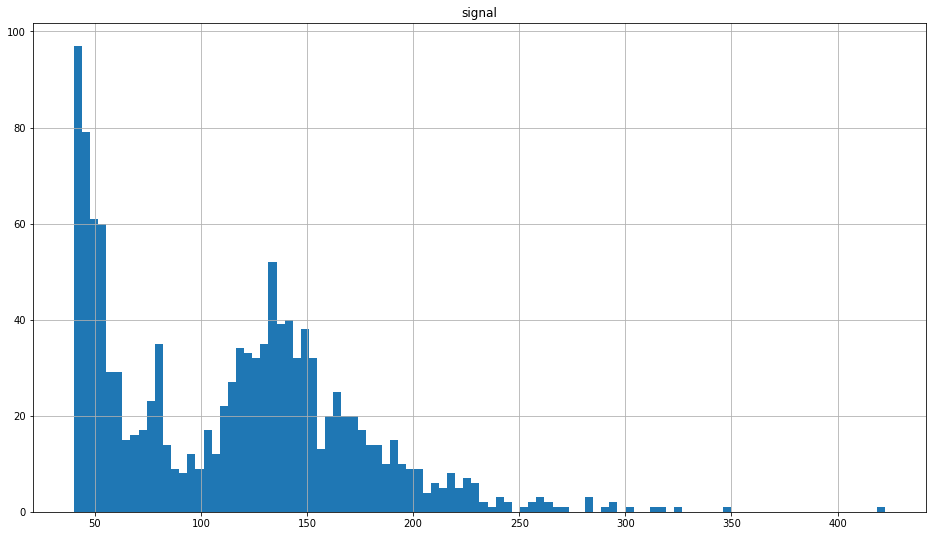

In [100]:
fig = plt.figure(figsize = (16,9))
ax = fig.gca()

CLUSTERS.hist(column='signal', bins=100, ax=ax)

In [101]:
# figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
# data = data[0]
# peaks, properties = find_peaks(data, height=20, prominence=(1, 1000), width=(1,5))
# plt.plot(data)
# plt.plot(peaks, data[peaks], "x")
# plt.plot(np.zeros_like(data), "--", color="gray")
# plt.show()
CLUSTERS

,evt,nclust,seed,signal,width,address,cog
0,2.0,1.0,176.0,148.417,1.0,176.0,176.000000
1,3.0,1.0,175.0,121.835,1.0,175.0,175.000000
2,4.0,1.0,185.0,110.334,2.0,184.0,184.657567
3,6.0,1.0,187.0,43.002,1.0,187.0,187.000000
4,7.0,1.0,184.0,168.782,1.0,184.0,184.000000
...,...,...,...,...,...,...,...
1220,1734.0,1.0,205.0,79.918,2.0,204.0,204.502853
1221,1735.0,1.0,191.0,154.158,1.0,191.0,191.000000
1222,1736.0,1.0,181.0,76.721,1.0,181.0,181.000000
1223,1737.0,1.0,172.0,292.641,1.0,172.0,172.000000


In [102]:
CLUSTERS.groupby(['nclust']).describe()

evt                                                                 \
         count         mean         std    min    25%     50%     75%     max   
nclust                                                                          
1.0     1159.0   867.371872  507.047743    2.0  440.5   852.0  1323.0  1738.0   
2.0       66.0  1025.606061  455.935956  156.0  656.0  1017.0  1391.0  1703.0   

          seed              ... address            cog                         \
         count        mean  ...     75%    max   count        mean        std   
nclust                      ...                                                 
1.0     1159.0  187.973253  ...  195.00  252.0  1159.0  187.950929  11.608961   
2.0       66.0  183.712121  ...  197.75  360.0    66.0  183.683482  39.555599   

                                                
          min    25%    50%         75%    max  
nclust                                          
1.0     143.0  181.0  188.0  195.000000  252.0  
2.0      58.0  167.5  184.0  198.140264  360.0  

[2 rows x 48 columns]